Reference: https://python.langchain.com/docs/how_to/message_history/

In [1]:
# Step 1: Defining a State
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage

# Define a typed state
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

/Users/kanavbansal/Developer/.env_jupyter/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Step 2: Defining graph nodes
from langchain_openai import ChatOpenAI

# Setup API Key
f = open('keys/.openai_api_key.txt')
OPENAI_API_KEY = f.read()

# Set the OpenAI Key and initialize a ChatModel
llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o")

def process(state: AgentState) -> AgentState:
    """This node will solve the request you input"""
    response = llm.invoke(state["messages"])

    state["messages"].append(AIMessage(content=response.content)) 
    print(f"\nAI: {response.content}")
    print("CURRENT STATE: ", state["messages"])

    return state

In [6]:
# Step 3: Define a Graph

from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)

graph.add_node("process", process)

graph.add_edge(START, "process")
graph.add_edge("process", END)

In [7]:
# Step 4: Compile the graph

agent = graph.compile()

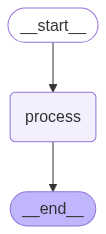

In [8]:
# Visualize the Graph

from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [9]:
conversation_history = []

user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    result = agent.invoke({"messages": conversation_history})
    conversation_history = result["messages"]
    user_input = input("Enter: ")

Enter:  hi, my name is ThatAIGuy.



AI: Hello, ThatAIGuy! How can I assist you today?
CURRENT STATE:  [HumanMessage(content='hi, my name is ThatAIGuy.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, ThatAIGuy! How can I assist you today?', additional_kwargs={}, response_metadata={})]


Enter:  can you tell me a joke?



AI: Sure! Why don't scientists trust atoms?

Because they make up everything!
CURRENT STATE:  [HumanMessage(content='hi, my name is ThatAIGuy.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, ThatAIGuy! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='can you tell me a joke?', additional_kwargs={}, response_metadata={}), AIMessage(content="Sure! Why don't scientists trust atoms?\n\nBecause they make up everything!", additional_kwargs={}, response_metadata={})]


Enter:  do you remember my name?



AI: Yes, you mentioned that your name is ThatAIGuy.
CURRENT STATE:  [HumanMessage(content='hi, my name is ThatAIGuy.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, ThatAIGuy! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='can you tell me a joke?', additional_kwargs={}, response_metadata={}), AIMessage(content="Sure! Why don't scientists trust atoms?\n\nBecause they make up everything!", additional_kwargs={}, response_metadata={}), HumanMessage(content='do you remember my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Yes, you mentioned that your name is ThatAIGuy.', additional_kwargs={}, response_metadata={})]


Enter:  exit
